<a href="https://colab.research.google.com/github/Clara-Lee2021/PortfolioProjects/blob/main/Clara(East_vs_West).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Model implement

## Load Data

In [ ]:
# import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# load cleaned data
fd = pd.read_excel("https://github.com/20JUNE22/capstone2023/raw/main/clean_data.xlsx")

fd

,EastofUS,Urban,LowIncomeTracts,PCTGQTRS,PovertyRate,MedianFamilyIncome,TractKids,TractSeniors,TractWhite,TractBlack,...,log10_TractSeniors,log10_TractWhite,log10_TractBlack,log10_TractAsian,log10_TractNHOPI,log10_TractAIAN,log10_TractOMultir,log10_TractHispanic,log10_TractHUNV,log10_TractSNAP
0,1,1,0,0.00,11.3,81250,507,221,1622,217,...,2.346353,3.210319,2.338456,1.176091,0.000000,1.176091,1.662758,1.653213,0.845098,2.012837
1,1,1,1,8.34,17.9,49000,606,214,888,1217,...,2.332438,2.948902,3.085647,0.778151,0.000000,0.778151,1.748188,1.880814,1.954243,2.195900
2,1,1,0,0.00,15.0,62609,894,439,2576,647,...,2.643453,3.411114,2.811575,1.255273,0.778151,1.079181,2.071882,1.944483,2.000000,2.238046
3,1,1,0,0.00,2.8,70607,1015,904,4086,193,...,2.956649,3.611405,2.287802,1.278754,0.698970,1.079181,1.875061,1.934498,1.342423,1.995635
4,1,1,0,1.68,15.2,96334,3162,1126,8666,1437,...,3.051924,3.937869,3.157759,2.472756,1.000000,1.690196,2.492760,2.551450,2.363612,2.531479
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71756,0,0,0,1.71,9.7,67254,884,593,3106,6,...,2.773786,3.492341,0.845098,1.204120,0.000000,1.447158,2.238046,2.491362,1.792392,1.812913
71757,0,1,0,0.38,11.6,64152,674,399,2377,5,...,2.602060,3.376212,0.778151,1.380211,0.000000,1.612784,2.344392,2.650308,1.949390,1.623249
71758,0,1,0,2.87,16.3,69605,614,516,2312,11,...,2.713491,3.364176,1.079181,1.041393,0.301030,1.431364,2.262451,2.610660,1.380211,1.812913
71759,0,0,0,7.60,17.5,74500,655,499,3179,15,...,2.698970,3.502427,1.204120,1.041393,0.301030,1.681241,1.799341,1.963788,1.681241,1.544068


In [ ]:
# drop the irrelevant inputs
us = fd.drop(fd.columns[1:17], axis=1)

us.head()

,EastofUS,FoodDesert,log10_PCTGQTRS,log10_PovertyRate,log10_MedianFamilyIncome,log10_TractKids,log10_TractSeniors,log10_TractWhite,log10_TractBlack,log10_TractAsian,log10_TractNHOPI,log10_TractAIAN,log10_TractOMultir,log10_TractHispanic,log10_TractHUNV,log10_TractSNAP
0,1,1,0.000000,1.089905,4.896262,2.705864,2.346353,3.210319,2.338456,1.176091,0.000000,1.176091,1.662758,1.653213,0.845098,2.012837
1,1,1,0.970347,1.276462,4.667472,2.783189,2.332438,2.948902,3.085647,0.778151,0.000000,0.778151,1.748188,1.880814,1.954243,2.195900
2,1,1,0.000000,1.204120,4.778954,2.951823,2.643453,3.411114,2.811575,1.255273,0.778151,1.079181,2.071882,1.944483,2.000000,2.238046
3,1,1,0.000000,0.579784,4.833205,3.006894,2.956649,3.611405,2.287802,1.278754,0.698970,1.079181,1.875061,1.934498,1.342423,1.995635
4,1,1,0.428135,1.209515,4.972369,3.500099,3.051924,3.937869,3.157759,2.472756,1.000000,1.690196,2.492760,2.551450,2.363612,2.531479


In [ ]:
# divided 'US' data into the independent and dependent variables
X = us.drop(['FoodDesert'], axis=1) # all independent
y = us['FoodDesert'] # target

X.head()

,EastofUS,log10_PCTGQTRS,log10_PovertyRate,log10_MedianFamilyIncome,log10_TractKids,log10_TractSeniors,log10_TractWhite,log10_TractBlack,log10_TractAsian,log10_TractNHOPI,log10_TractAIAN,log10_TractOMultir,log10_TractHispanic,log10_TractHUNV,log10_TractSNAP
0,1,0.000000,1.089905,4.896262,2.705864,2.346353,3.210319,2.338456,1.176091,0.000000,1.176091,1.662758,1.653213,0.845098,2.012837
1,1,0.970347,1.276462,4.667472,2.783189,2.332438,2.948902,3.085647,0.778151,0.000000,0.778151,1.748188,1.880814,1.954243,2.195900
2,1,0.000000,1.204120,4.778954,2.951823,2.643453,3.411114,2.811575,1.255273,0.778151,1.079181,2.071882,1.944483,2.000000,2.238046
3,1,0.000000,0.579784,4.833205,3.006894,2.956649,3.611405,2.287802,1.278754,0.698970,1.079181,1.875061,1.934498,1.342423,1.995635
4,1,0.428135,1.209515,4.972369,3.500099,3.051924,3.937869,3.157759,2.472756,1.000000,1.690196,2.492760,2.551450,2.363612,2.531479


## Filter Data by Dimension

In [ ]:
# Filtering out the West states
east = us[us['EastofUS'] == 1]

# Printing the filtered DataFrame
east.head()

,EastofUS,FoodDesert,log10_PCTGQTRS,log10_PovertyRate,log10_MedianFamilyIncome,log10_TractKids,log10_TractSeniors,log10_TractWhite,log10_TractBlack,log10_TractAsian,log10_TractNHOPI,log10_TractAIAN,log10_TractOMultir,log10_TractHispanic,log10_TractHUNV,log10_TractSNAP
0,1,1,0.000000,1.089905,4.896262,2.705864,2.346353,3.210319,2.338456,1.176091,0.000000,1.176091,1.662758,1.653213,0.845098,2.012837
1,1,1,0.970347,1.276462,4.667472,2.783189,2.332438,2.948902,3.085647,0.778151,0.000000,0.778151,1.748188,1.880814,1.954243,2.195900
2,1,1,0.000000,1.204120,4.778954,2.951823,2.643453,3.411114,2.811575,1.255273,0.778151,1.079181,2.071882,1.944483,2.000000,2.238046
3,1,1,0.000000,0.579784,4.833205,3.006894,2.956649,3.611405,2.287802,1.278754,0.698970,1.079181,1.875061,1.934498,1.342423,1.995635
4,1,1,0.428135,1.209515,4.972369,3.500099,3.051924,3.937869,3.157759,2.472756,1.000000,1.690196,2.492760,2.551450,2.363612,2.531479


In [ ]:
# Filtering out the East states
west = us[us['EastofUS'] == 0]

# Printing the filtered DataFrame
west.head()

,EastofUS,FoodDesert,log10_PCTGQTRS,log10_PovertyRate,log10_MedianFamilyIncome,log10_TractKids,log10_TractSeniors,log10_TractWhite,log10_TractBlack,log10_TractAsian,log10_TractNHOPI,log10_TractAIAN,log10_TractOMultir,log10_TractHispanic,log10_TractHUNV,log10_TractSNAP
1167,0,1,1.747800,1.214844,4.877619,2.570543,2.193125,2.820201,2.342423,3.053463,1.301030,2.943000,2.376577,2.586587,2.298853,2.049218
1168,0,1,1.585122,1.245513,4.769023,2.311754,1.880814,2.462398,1.518514,2.252853,0.903090,2.770852,1.959041,1.785330,1.903090,1.477121
1169,0,0,1.689930,0.913814,4.977019,2.786751,2.075547,3.234517,2.478566,3.155032,1.986772,2.429752,2.755875,2.824126,2.060698,1.623249
1170,0,1,0.534026,1.082785,5.045917,3.188928,2.478566,3.694781,1.763428,1.869232,0.698970,2.471292,2.552668,2.322219,1.431364,2.060698
1171,0,0,0.113943,0.949390,5.053359,3.133539,2.681241,3.642662,1.690196,2.086360,1.113943,2.457882,2.604226,2.305351,0.903090,1.838849


## Split Data

In [ ]:
from sklearn.model_selection import train_test_split
columns = ['log10_PCTGQTRS','log10_PovertyRate', 'log10_MedianFamilyIncome', 'log10_TractKids', 'log10_TractSeniors',
           'log10_TractWhite', 'log10_TractBlack', 'log10_TractAsian', 'log10_TractNHOPI','log10_TractOMultir',
           'log10_TractAIAN',  'log10_TractHispanic', 'log10_TractHUNV',
           'log10_TractSNAP']

X_train_east, X_test_east, y_train_east, y_test_east = train_test_split(east[columns], east['FoodDesert'], test_size=0.2, random_state=123)
X_train_west, X_test_west, y_train_west, y_test_west = train_test_split(west[columns], west['FoodDesert'], test_size=0.2, random_state=123)


## Model Selection

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.svm import SVC


# Load your data and split into training and testing sets
X_train_east, X_test_east, y_train_east, y_test_east = train_test_split(east[columns], east['FoodDesert'], test_size=0.2, random_state=123)
X_train_west, X_test_west, y_train_west, y_test_west = train_test_split(west[columns], west['FoodDesert'], test_size=0.2, random_state=123)

# Define the models you want to compare
models = [
    ('Logistic Regression', LogisticRegression(max_iter=1000)),
      ('SVM', SVC()),
    ('Random Forest', RandomForestClassifier()),
    ('XGBoost', XGBClassifier()),
    ('LightGBM', LGBMClassifier())
]

# Train and evaluate each model on East dataset
for name, model in models:
    # Fit the model to the training data
    model.fit(X_train_east, y_train_east)

    # Make predictions on the testing data
    y_pred_east = model.predict(X_test_east)

    # Evaluate the model's performance using common metrics
    accuracy_east = accuracy_score(y_test_east, y_pred_east)
    precision_east = precision_score(y_test_east, y_pred_east)
    recall_east = recall_score(y_test_east, y_pred_east)
    f1_east = f1_score(y_test_east, y_pred_east)

    # Print the model's performance metrics on East dataset
    print(f"{name} Results on East Dataset:")
    print(f"Accuracy: {accuracy_east:.3f}")
    print(f"Precision: {precision_east:.3f}")
    print(f"Recall: {recall_east:.3f}")
    print(f"F1 Score: {f1_east:.3f}")
    print()

# Train and evaluate each model on West dataset
for name, model in models:
    # Fit the model to the training data
    model.fit(X_train_west, y_train_west)

    # Make predictions on the testing data
    y_pred_west = model.predict(X_test_west)

    # Evaluate the model's performance using common metrics
    accuracy_west = accuracy_score(y_test_west, y_pred_west)
    precision_west = precision_score(y_test_west, y_pred_west)
    recall_west = recall_score(y_test_west, y_pred_west)
    f1_west = f1_score(y_test_west, y_pred_west)

    # Print the model's performance metrics on West dataset
    print(f"{name} Results on West Dataset:")
    print(f"Accuracy: {accuracy_west:.3f}")
    print(f"Precision: {precision_west:.3f}")
    print(f"Recall: {recall_west:.3f}")
    print(f"F1 Score: {f1_west:.3f}")
    print()




Logistic Regression Results on East Dataset:
Accuracy: 0.654
Precision: 0.604
Recall: 0.362
F1 Score: 0.453

SVM Results on East Dataset:
Accuracy: 0.675
Precision: 0.694
Recall: 0.319
F1 Score: 0.438

Random Forest Results on East Dataset:
Accuracy: 0.688
Precision: 0.650
Recall: 0.458
F1 Score: 0.537

XGBoost Results on East Dataset:
Accuracy: 0.682
Precision: 0.628
Recall: 0.482
F1 Score: 0.545

LightGBM Results on East Dataset:
Accuracy: 0.685
Precision: 0.642
Recall: 0.457
F1 Score: 0.534

Logistic Regression Results on West Dataset:
Accuracy: 0.687
Precision: 0.567
Recall: 0.272
F1 Score: 0.368

SVM Results on West Dataset:
Accuracy: 0.700
Precision: 0.693
Recall: 0.185
F1 Score: 0.293

Random Forest Results on West Dataset:
Accuracy: 0.719
Precision: 0.624
Recall: 0.409
F1 Score: 0.494

XGBoost Results on West Dataset:
Accuracy: 0.711
Precision: 0.590
Recall: 0.447
F1 Score: 0.509

LightGBM Results on West Dataset:
Accuracy: 0.724
Precision: 0.621
Recall: 0.455
F1 Score: 0.525



* Both Random Forest and LightGBM have very similar metrics including higher accuracy.
*  I will choose two algorithms for this project as following:
 - Random Forest : Since the data has good amount of outliers, this method will be suitable.
 - XGBoost : It has higher recall rate which is aligned with our project goal.

# Base Model 1 (Random Forest)

### East

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split


# Train the Random Forest model on the East dataset
rf_east = RandomForestClassifier(random_state=123)
rf_east.fit(X_train_east, y_train_east)

# Make predictions on the testing data
y_pred_east = rf_east.predict(X_test_east)

# Evaluate the model's performance using common metrics
accuracy_east = accuracy_score(y_test_east, y_pred_east)
precision_east = precision_score(y_test_east, y_pred_east)
recall_east = recall_score(y_test_east, y_pred_east)
f1_east = f1_score(y_test_east, y_pred_east)

# Print the model's performance metrics on East dataset
print("Random Forest Results on East Dataset:")
print(f"Accuracy: {accuracy_east:.3f}")
print(f"Precision: {precision_east:.3f}")
print(f"Recall: {recall_east:.3f}")
print(f"F1 Score: {f1_east:.3f}")


Random Forest Results on East Dataset:
Accuracy: 0.688
Precision: 0.651
Recall: 0.457
F1 Score: 0.537


### West

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Train the Random Forest model on the West dataset
rf_west = RandomForestClassifier(random_state=123)
rf_west.fit(X_train_west, y_train_west)

# Make predictions on the testing data
y_pred_west = rf_west.predict(X_test_west)

# Evaluate the model's performance using common metrics
accuracy_west = accuracy_score(y_test_west, y_pred_west)
precision_west = precision_score(y_test_west, y_pred_west)
recall_west = recall_score(y_test_west, y_pred_west)
f1_west = f1_score(y_test_west, y_pred_west)

# Print the model's performance metrics on West dataset
print("Random Forest Results on West Dataset:")
print(f"Accuracy: {accuracy_west:.3f}")
print(f"Precision: {precision_west:.3f}")
print(f"Recall: {recall_west:.3f}")
print(f"F1 Score: {f1_west:.3f}")


Random Forest Results on West Dataset:
Accuracy: 0.718
Precision: 0.617
Recall: 0.414
F1 Score: 0.495


* West model has a higher accuracy of 0.718 than east (0.688)
* East model has higher precision and recall rate.
* Overall, both baseline model shows some level of predictive power, but there's room for improvement.

# Model 1 Improvement

### Hyper parameter (East and West)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [5, 10, 15, 20, 25, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt'],
    'bootstrap': [True, False]
}

# Split the data into training and testing sets
X_train_east, X_test_east, y_train_east, y_test_east = train_test_split(east[columns], east['FoodDesert'], test_size=0.2, random_state=123)
X_train_west, X_test_west, y_train_west, y_test_west = train_test_split(west[columns], west['FoodDesert'], test_size=0.2, random_state=123)

# Create a Random Forest model
rf_east = RandomForestClassifier(random_state=123)
rf_west = RandomForestClassifier(random_state=123)

# Perform hyperparameter tuning with RandomizedSearchCV
search_east = RandomizedSearchCV(rf_east, param_grid, n_iter=100, cv=5, random_state=123, n_jobs=-1, verbose=2)
search_west = RandomizedSearchCV(rf_west, param_grid, n_iter=100, cv=5, random_state=123, n_jobs=-1, verbose=2)

# Fit the models on the training data
search_east.fit(X_train_east, y_train_east)
search_west.fit(X_train_west, y_train_west)

# Make predictions on the test sets
y_pred_east = search_east.predict(X_test_east)
y_pred_west = search_west.predict(X_test_west)

# Calculate the accuracy of the models
accuracy_east = accuracy_score(y_test_east, y_pred_east)
accuracy_west = accuracy_score(y_test_west, y_pred_west)
print("Model accuracy (East):", accuracy_east)
print("Model accuracy (West):", accuracy_west)

# Print the best parameters for the models
print("Best parameters (East):", search_east.best_params_)
print("Best parameters (West):", search_west.best_params_)


Fitting 5 folds for each of 100 candidates, totalling 500 fits


* East accuracy is 0.689
* West accuracy is 0.727
* East has little or no improvement after hyperparameter tuning.
* West has an 0.18 improvement on accuracy.
* Feature importance will be conducted on them.

### Feature importance (East)

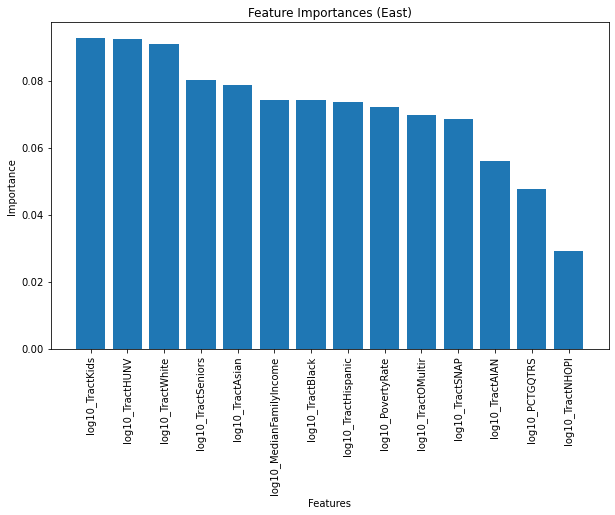

In [ ]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Load your data and split into training and testing sets
X_train_east, X_test_east, y_train_east, y_test_east = train_test_split(east[columns], east['FoodDesert'], test_size=0.2, random_state=123)

# Create a Random Forest model with 100 trees
rf_east = RandomForestClassifier(n_estimators=100, random_state=123)

# Fit the model on the training data
rf_east.fit(X_train_east, y_train_east)

# Obtain feature importances
importances = rf_east.feature_importances_

# Sort feature importances in descending order
sorted_indices = importances.argsort()[::-1]
sorted_importances = importances[sorted_indices]

# Get the names of features in descending order of importance
sorted_features = X_train_east.columns[sorted_indices]

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(len(sorted_importances)), sorted_importances, tick_label=sorted_features)
plt.xticks(rotation=90)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.title("Feature Importances (East)")
plt.show()


* 'TractKids','TractHUNV',and 'TractWhite' appear to relatively highly contribute to the food desert in East of the U.S.
* The importance scores of all variables are relatively low(under 0.10), it suggests that the selected variables may not be strongly predictive of the target variable.
* Feature selection may not have a significant impact on improving the model's performance.

In [ ]:
# Select the desired features
selected_features = [ 'log10_TractKids','log10_TractAsian','log10_MedianFamilyIncome','log10_TractBlack','log10_TractHispanic',
                     'log10_PovertyRate','log10_TractSNAP','log10_TractOMultir',
                     'log10_TractWhite',  'log10_TractHUNV', 'log10_TractSeniors']

# Split the data into training and testing sets
X_train_east, X_test_east, y_train_east, y_test_east = train_test_split(east[selected_features], east['FoodDesert'], test_size=0.2, random_state=123)

# Create a Random Forest model
rf_east = RandomForestClassifier(n_estimators=300, random_state=123)

# Fit the model on the training data
rf_east.fit(X_train_east, y_train_east)

# Make predictions on the test set
y_pred_east = rf_east.predict(X_test_east)

# Calculate the accuracy of the model
accuracy_east = accuracy_score(y_test_east, y_pred_east)
print("Model accuracy (East):", accuracy_east)

# Calculate the recall score for West dataset
recall_east = recall_score(y_test_east, y_pred_east)
print("Recall score for East dataset:", recall_east)



Model accuracy (East): 0.6879540765987981
Recall score for East dataset: 0.46857272520989335


In [ ]:
# Select the desired features
selected_features = [ 'log10_TractKids','log10_TractAsian','log10_MedianFamilyIncome','log10_TractBlack',
                     'log10_TractHispanic',
                     'log10_TractWhite',  'log10_TractHUNV', 'log10_TractSeniors']

# Split the data into training and testing sets
X_train_east, X_test_east, y_train_east, y_test_east = train_test_split(east[selected_features], east['FoodDesert'], test_size=0.2, random_state=123)

# Create a Random Forest model
rf_east = RandomForestClassifier(n_estimators=300, random_state=123)

# Fit the model on the training data
rf_east.fit(X_train_east, y_train_east)

# Make predictions on the test set
y_pred_east = rf_east.predict(X_test_east)

# Calculate the accuracy of the model
accuracy_east = accuracy_score(y_test_east, y_pred_east)
print("Model accuracy (East):", accuracy_east)

# Calculate the recall score for West dataset
recall_east = recall_score(y_test_east, y_pred_east)
print("Recall score for East dataset:", recall_east)


Model accuracy (East): 0.6829312045923401
Recall score for East dataset: 0.46244610846380757



* When 'PCTGQTRS' and 'NHOPI' were dropped, the accuracy was decreased 0.05 but recall score was improved 0.05.
* East needs another way to be improved. I will try feature engineering.

### Feature importance (West)

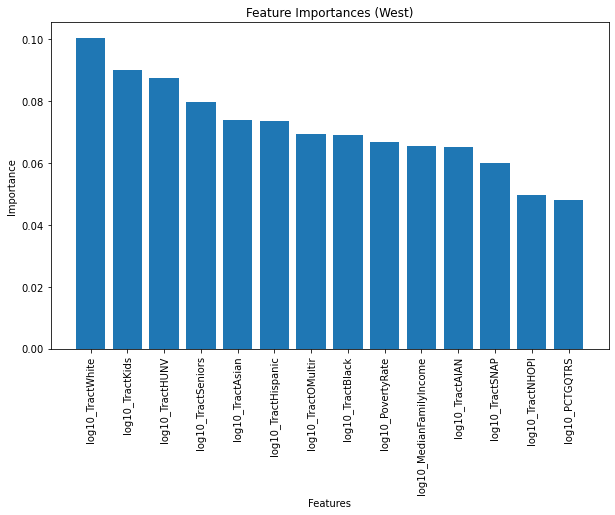

In [ ]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest model with 100 trees
rf_west = RandomForestClassifier(n_estimators=100, random_state=123)

# Train the model on the West dataset
rf_west.fit(X_train_west, y_train_west)

# Get feature importances
importances_west = rf_west.feature_importances_

# Sort feature importances in descending order
sorted_indices_west = importances_west.argsort()[::-1]
sorted_importances_west = importances_west[sorted_indices_west]

# Get the names of features in descending order of importance
sorted_features_west = X_train_west.columns[sorted_indices_west]

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(len(sorted_importances_west)), sorted_importances_west, tick_label=sorted_features_west)
plt.xticks(rotation=90)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.title("Feature Importances (West)")
plt.show()


* 'TractWhite','TractKids',and 'TractHUNV' appear to relatively highly contribute to the food desert in West of the U.S.
* The 'TractWhite' has the highest importance value about 0.10.
* West features are more significant than East.

In [ ]:
# Select the desired features
selected_features = [ 'log10_TractWhite', 'log10_TractHUNV','log10_TractKids', 'log10_TractSeniors','log10_TractAsian',
                    'log10_TractHispanic','log10_TractBlack',
                      'log10_MedianFamilyIncome','log10_TractSNAP']

# Split the data into training and testing sets
X_train_west, X_test_west, y_train_west, y_test_west = train_test_split(west[selected_features], west['FoodDesert'], test_size=0.2, random_state=123)

# Create a Random Forest model
rf_west = RandomForestClassifier(n_estimators=300, random_state=123)

# Fit the model on the training data
rf_west.fit(X_train_west, y_train_west)

# Make predictions on the test set
y_pred_west = rf_west.predict(X_test_west)

# Calculate the accuracy of the model
accuracy_west = accuracy_score(y_test_west, y_pred_west)
print("Model accuracy (West):", accuracy_west)

# Calculate the recall score for West dataset
recall_west = recall_score(y_test_west, y_pred_west)
print("Recall score for West dataset:", recall_west)


Model accuracy (West): 0.7247191011235955
Recall score for West dataset: 0.4342963653308481


* I dropped  ‘log10_TractOMultir’, ‘log10_PovertyRate’, ‘log10_TractSNAP’, ‘log10_TractPCTGQTRS’,’ ‘log10_TractNHOPI’.
* The metrics were improved lightly to 0.725 of accuracy and 0.434 of recall.

## Feature Engineering (East)

In [ ]:
from sklearn.preprocessing import PolynomialFeatures


# Split the data into training and testing sets
X_train_east, X_test_east, y_train_east, y_test_east = train_test_split(east[columns], east['FoodDesert'], test_size=0.2, random_state=123)

# Create a PolynomialFeatures object
poly = PolynomialFeatures(degree=2)

# Fit and transform the training data
X_train_poly = poly.fit_transform(X_train_east)

# Transform the testing data
X_test_poly = poly.transform(X_test_east)

# Create a Random Forest model
model_east_poly = RandomForestClassifier(n_estimators=300, random_state=123)

# Fit the model on the polynomial training data
model_east_poly.fit(X_train_poly, y_train_east)

# Make predictions on the polynomial test set
y_pred_east_poly = model_east_poly.predict(X_test_poly)

# Calculate the accuracy of the model
accuracy_east_poly = accuracy_score(y_test_east, y_pred_east_poly)
print("Model accuracy with polynomial features (East):", accuracy_east_poly)
# Calculate the recall score for East dataset
recall_east_poly = recall_score(y_test_east, y_pred_east_poly)
print("Recall score for polynomial feature (East):", recall_east_poly)


Model accuracy with polynomial features (East): 0.6901964301731097
Recall score for polynomial feature (East): 0.4765146358066712


* With all factors, the model improved to 0.690 of accuracy and 0.477 of recall.


#### Findings
* East
 - Improved East Model 1 has 0.690 of accuracy with all features.
 - When PCTGGQTRS and NHOPI were dropped, it has better recall score.
 - Kids, HUNV,White, Seniors, Asian are top 5 features for importance in oder.

* West
 - Improved West Model 1 has 0.727 of accuracy with `log10_TractWhite`, `log10_TractHUNV`,`log10_TractKids`, `log10_TractSeniors`,`log10_TractAsian`, `log10_TractHispanic`,`log10_TractBlack`, `log10_MedianFamilyIncome`,`log10_TractSNAP`
 - White, Kids, HUNV, Seniors, Asian are top 5 features for importance in order.
* Both East and West have the same top 5 features but different in order.
* Each feature in both East and West have has the importance less than 0.1, which suggests that the model is not heavily relying on any specific features to make accurate predictions.

# Base Model 2 (XGBoost)

### East

In [ ]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score

# Split the data into training and testing sets for East dataset
X_train_east, X_test_east, y_train_east, y_test_east = train_test_split(east.drop(['FoodDesert'], axis=1), east['FoodDesert'], test_size=0.2, random_state=123)

# Create an XGBoost model for East dataset
model_east = xgb.XGBClassifier(random_state = 123)

# Fit the model on the training data for East dataset
model_east.fit(X_train_east, y_train_east)

# Make predictions on the test set for East dataset
y_pred_east = model_east.predict(X_test_east)

# Calculate the accuracy of the model for East dataset
accuracy_east = accuracy_score(y_test_east, y_pred_east)
print("Model accuracy (East):", accuracy_east)

# Calculate the recall score for East dataset
recall_east = recall_score(y_test_east, y_pred_east)
print("Recall score for East dataset:", recall_east)


Model accuracy (East): 0.6823033455915328
Recall score for East dataset: 0.4815066938960744


### West

In [ ]:

# Split the data into training and testing sets for West dataset
X_train_west, X_test_west, y_train_west, y_test_west = train_test_split(west.drop(['FoodDesert'], axis=1), west['FoodDesert'], test_size=0.2, random_state=123)

# Create an XGBoost model for West dataset
model_west = xgb.XGBClassifier()

# Fit the model on the training data for West dataset
model_west.fit(X_train_west, y_train_west)

# Make predictions on the test set for West dataset
y_pred_west = model_west.predict(X_test_west)

# Calculate the accuracy of the model for West dataset
accuracy_west = accuracy_score(y_test_west, y_pred_west)
print("Model accuracy (West):", accuracy_west)

# Calculate the recall score for West dataset
recall_west = recall_score(y_test_west, y_pred_west)
print("Recall score for West dataset:", recall_west)


Model accuracy (West): 0.7109862671660424
Recall score for West dataset: 0.4473438956197577


# Model 2 Improvement (XGBoost)


### Feature importance (East)

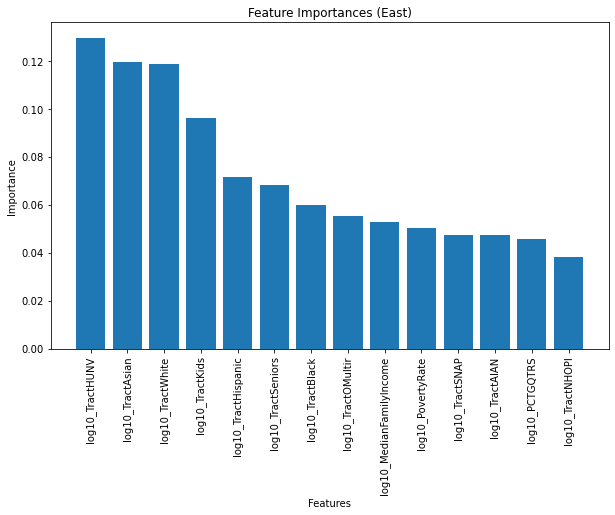

In [ ]:
import xgboost as xgb
import matplotlib.pyplot as plt


# Split the data into training and testing sets for East dataset
X_train_east, X_test_east, y_train_east, y_test_east = train_test_split(east[columns], east['FoodDesert'], test_size=0.2, random_state=123)

# Create a base XGBoost model for East dataset
base_model_east = xgb.XGBClassifier(random_state=123)

# Fit the model on the training data for East dataset
base_model_east.fit(X_train_east, y_train_east)

# Obtain feature importances for East dataset
importances_east = base_model_east.feature_importances_

# Get the names of features in descending order of importance for East dataset
sorted_features_east = X_train_east.columns[importances_east.argsort()[::-1]]

# Plot feature importances for East dataset
plt.figure(figsize=(10, 6))
plt.bar(range(len(importances_east)), importances_east[importances_east.argsort()[::-1]])
plt.xticks(range(len(importances_east)), sorted_features_east, rotation=90)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.title("Feature Importances (East)")
plt.show()


In [ ]:
# Select the desired features for East dataset
selected_features_east = ['log10_TractKids', 'log10_TractAsian', 'log10_MedianFamilyIncome', 'log10_TractBlack', 'log10_TractHispanic',
                     'log10_PovertyRate',  'log10_TractWhite', 'log10_TractHUNV', 'log10_TractSeniors']

# Split the data into training and testing sets for East dataset
X_train_east, X_test_east, y_train_east, y_test_east = train_test_split(east[selected_features_east], east['FoodDesert'], test_size=0.2, random_state=123)

# Create an XGBoost model for East dataset
xg_model_east = xgb.XGBClassifier(random_state=123)

# Fit the model on the training data for East dataset
xg_model_east.fit(X_train_east, y_train_east)

# Make predictions on the testing data for East dataset
y_pred_east = xg_model_east.predict(X_test_east)

# Evaluate the model's performance using common metrics for East dataset
accuracy_east = accuracy_score(y_test_east, y_pred_east)
recall_east = recall_score(y_test_east, y_pred_east)

# Print the model's performance metrics on East dataset
print("XGBoost Results on East Dataset:")
print(f"Accuracy: {accuracy_east:.3f}")
print(f"Recall: {recall_east:.3f}")


XGBoost Results on East Dataset:
Accuracy: 0.682
Recall: 0.470


* The feature importance didn't improve the East model.
* I will use the importance for reference.

### Feature Importance (West)

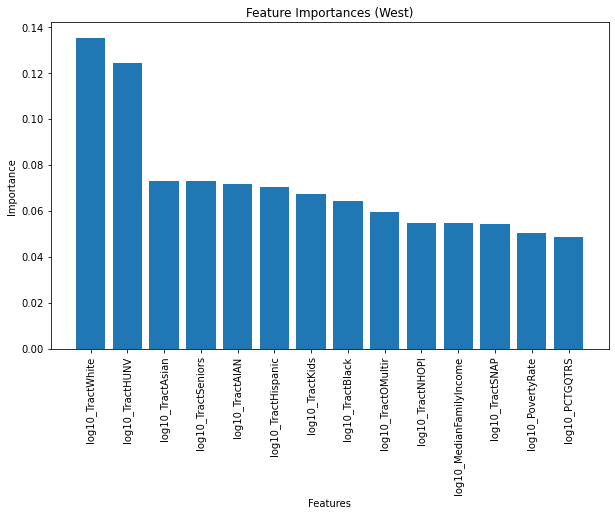

In [ ]:

# Split the data into training and testing sets for West dataset
X_train_west, X_test_west, y_train_west, y_test_west = train_test_split(west[columns], west['FoodDesert'], test_size=0.2, random_state=123)

# Create a base XGBoost model for West dataset
base_west_model = xgb.XGBClassifier(random_state=123)

# Fit the model on the training data for West dataset
base_west_model.fit(X_train_west, y_train_west)

# Obtain feature importances for West dataset
importances_west = base_west_model.feature_importances_

# Get the names of features in descending order of importance for West dataset
sorted_features_west = X_train_west.columns[importances_west.argsort()[::-1]]

# Plot feature importances for West dataset
plt.figure(figsize=(10, 6))
plt.bar(range(len(importances_west)), importances_west[importances_west.argsort()[::-1]])
plt.xticks(range(len(importances_west)), sorted_features_west, rotation=90)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.title("Feature Importances (West)")
plt.show()


* In West, White, HUNV, Asian, Seniors and AIAN are top 5 important features.

In [ ]:
# Select the desired features for West dataset
selected_features_west = ['log10_TractAIAN', 'log10_TractAsian','log10_TractKids',
                      'log10_TractWhite', 'log10_TractHUNV', 'log10_TractSeniors','log10_TractHispanic']

# Split the data into training and testing sets for West dataset
X_train_west, X_test_west, y_train_west, y_test_west = train_test_split(west[selected_features_west], west['FoodDesert'], test_size=0.2, random_state=123)

# Create an XGBoost model for West dataset
xg_west_model = xgb.XGBClassifier(random_state=123)

# Fit the model on the training data for West dataset
xg_west_model.fit(X_train_west, y_train_west)

# Make predictions on the testing data for West dataset
y_pred_west = xg_west_model.predict(X_test_west)

# Evaluate the model's performance using common metrics for West dataset
accuracy_west = accuracy_score(y_test_west, y_pred_west)
recall_west = recall_score(y_test_west, y_pred_west)

# Print the model's performance metrics on West dataset
print("XGBoost Results on West Dataset:")
print(f"Accuracy: {accuracy_west:.3f}")
print(f"Recall: {recall_west:.3f}")


XGBoost Results on West Dataset:
Accuracy: 0.708
Recall: 0.443


In [ ]:
# Select the desired features for West dataset
selected_features_west = ['log10_TractKids', 'log10_TractAsian', 'log10_MedianFamilyIncome', 'log10_TractBlack',
                          'log10_TractHispanic',
                    'log10_TractSNAP', 'log10_TractWhite', 'log10_TractHUNV', 'log10_TractSeniors']

# Split the data into training and testing sets for West dataset
X_train_west, X_test_west, y_train_west, y_test_west = train_test_split(west[selected_features_west], west['FoodDesert'], test_size=0.2, random_state=123)

# Create an XGBoost model for West dataset
xg_west_model = xgb.XGBClassifier(random_state=123)

# Fit the model on the training data for West dataset
xg_west_model.fit(X_train_west, y_train_west)

# Make predictions on the testing data for West dataset
y_pred_west = xg_west_model.predict(X_test_west)

# Evaluate the model's performance using common metrics for West dataset
accuracy_west = accuracy_score(y_test_west, y_pred_west)
recall_west = recall_score(y_test_west, y_pred_west)

# Print the model's performance metrics on West dataset
print("XGBoost Results on West Dataset:")
print(f"Accuracy: {accuracy_west:.3f}")
print(f"Recall: {recall_west:.3f}")


XGBoost Results on West Dataset:
Accuracy: 0.705
Recall: 0.441


* Selected variable model didn't improve the model performance.

###  Feature Scaling for XGBoost Models

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, recall_score
from sklearn.model_selection import train_test_split
import xgboost as xgb

# Split the data into training and testing sets
X_train_east_selected, X_test_east_selected, y_train_east, y_test_east = train_test_split(
    east[columns], east['FoodDesert'], test_size=0.2, random_state=123)

# Instantiate the StandardScaler object
scaler = StandardScaler()

# Fit the scaler on the training data
scaler.fit(X_train_east_selected)

# Transform the training and testing data
X_train_east_scaled = scaler.transform(X_train_east_selected)
X_test_east_scaled = scaler.transform(X_test_east_selected)

# Convert the transformed data into DMatrix format
dtrain = xgb.DMatrix(X_train_east_scaled, label=y_train_east)
dtest = xgb.DMatrix(X_test_east_scaled)

# Set the XGBoost parameters
params = {
    'objective': 'binary:logistic',
    'eval_metric': 'logloss',
    'eta': 0.1,
    'max_depth': 3,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'random_state': 123
}

# Train the XGBoost model
model_east = xgb.train(params, dtrain, num_boost_round=100)

# Make predictions on the testing data
y_pred_east = model_east.predict(dtest)

# Convert predicted probabilities to classes
y_pred_east_class = [1 if p >= 0.5 else 0 for p in y_pred_east]

# Calculate the accuracy and recall of the model
accuracy_east = accuracy_score(y_test_east, y_pred_east_class)
recall_east = recall_score(y_test_east, y_pred_east_class)
print("Model accuracy (East) with feature scaling:", accuracy_east)
print("Model recall (East) with feature scaling:", recall_east)


Model accuracy (East) with feature scaling: 0.6800609920172213
Model recall (East) with feature scaling: 0.4104833219877468


* Scaling didn't improve model 2 East.

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, recall_score
from sklearn.model_selection import train_test_split
import xgboost as xgb

# Split the data into training and testing sets
X_train_west, X_test_west, y_train_west, y_test_west = train_test_split(
    west[columns], west['FoodDesert'], test_size=0.2, random_state=123)

# Instantiate the StandardScaler object
scaler = StandardScaler()

# Fit the scaler on the training data
scaler.fit(X_train_west)

# Transform the training and testing data
X_train_west_scaled = scaler.transform(X_train_west)
X_test_west_scaled = scaler.transform(X_test_west)

# Convert the transformed data into DMatrix format
dtrain = xgb.DMatrix(X_train_west_scaled, label=y_train_west)
dtest = xgb.DMatrix(X_test_west_scaled)

# Set the XGBoost parameters
params = {
    'objective': 'binary:logistic',
    'eval_metric': 'logloss',
    'eta': 0.1,
    'max_depth': 3,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'random_state': 123
}

# Train the XGBoost model
model_west = xgb.train(params, dtrain, num_boost_round=100)

# Make predictions on the testing data
y_pred_west = model_west.predict(dtest)

# Convert predicted probabilities to classes
y_pred_west_class = [1 if p >= 0.5 else 0 for p in y_pred_west]

# Calculate the accuracy and recall scores of the model
accuracy_west = accuracy_score(y_test_west, y_pred_west_class)
recall_west = recall_score(y_test_west, y_pred_west_class)
print("Model accuracy (West) with feature scaling:", accuracy_west)
print("Model recall (West) with feature scaling:", recall_west)


Model accuracy (West) with feature scaling: 0.7278401997503121
Model recall (West) with feature scaling: 0.4212488350419385


* Model 2 West improved to 0.728 of accuracy but dropped in recall score.



---



#Final Model

* The final models for both East and West dimension are Model 1. (Random Forest)
* Model 1 has better accuracy and recall score.

## Validation